## __Data Cleaning the Restaurant Data__

In [70]:
# import key libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### __Loading data from zomato.csv__

In [71]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Get the shape of the DataFrame: Rows and columns

In [72]:
df.shape

(51717, 17)

### Check columns

In [73]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Drop redundant/unnecessary columns

In [74]:
# Remove url, address, phone, dish_liked, reviews_list, menu_item
df = df.drop(['url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item'], axis=1)

### Drop any duplicate rows

In [75]:
df.shape

(51717, 11)

In [76]:
df.drop_duplicates(inplace=True)

In [77]:
df.shape

(51609, 11)

### Renaming columns
- __First inspect columns to rename with df.columns command__
- __Then delete similar columns__

In [78]:
df.columns.tolist()

['name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'location',
 'rest_type',
 'cuisines',
 'approx_cost(for two people)',
 'listed_in(type)',
 'listed_in(city)']

In [79]:
# The lengthy approx_cost(for two people) can be shortened to 'cost2plates'
# While listed_in(type) can simply be renamed 'type'
# 'location' can also be renamed 'city'
df.rename(columns={'approx_cost(for two people)':'cost2plates', 'listed_in(type)':'serving_style', 'location':'city', 'rest_type':'restaurant_type'},inplace=True)

### Confirm that the columns are well renamed

In [80]:
df.columns.tolist()

['name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'city',
 'restaurant_type',
 'cuisines',
 'cost2plates',
 'serving_style',
 'listed_in(city)']

### Checking similar columns & dropping redundant ones
- __Observing the columns above, compare 'city' and 'listed_in(city)'__
- __Load the 2 into a new dataframe for easy comparison as below__

#### Method 1: Short, using .unique() on each column individually

__Checking unique 'city' names__

In [81]:
df['city'].unique().tolist()

['Banashankari',
 'Basavanagudi',
 'Mysore Road',
 'Jayanagar',
 'Kumaraswamy Layout',
 'Rajarajeshwari Nagar',
 'Vijay Nagar',
 'Uttarahalli',
 'JP Nagar',
 'South Bangalore',
 'City Market',
 'Nagarbhavi',
 'Bannerghatta Road',
 'BTM',
 'Kanakapura Road',
 'Bommanahalli',
 nan,
 'CV Raman Nagar',
 'Electronic City',
 'HSR',
 'Marathahalli',
 'Sarjapur Road',
 'Wilson Garden',
 'Shanti Nagar',
 'Koramangala 5th Block',
 'Koramangala 8th Block',
 'Richmond Road',
 'Koramangala 7th Block',
 'Jalahalli',
 'Koramangala 4th Block',
 'Bellandur',
 'Whitefield',
 'East Bangalore',
 'Old Airport Road',
 'Indiranagar',
 'Koramangala 1st Block',
 'Frazer Town',
 'RT Nagar',
 'MG Road',
 'Brigade Road',
 'Lavelle Road',
 'Church Street',
 'Ulsoor',
 'Residency Road',
 'Shivajinagar',
 'Infantry Road',
 'St. Marks Road',
 'Cunningham Road',
 'Race Course Road',
 'Commercial Street',
 'Vasanth Nagar',
 'HBR Layout',
 'Domlur',
 'Ejipura',
 'Jeevan Bhima Nagar',
 'Old Madras Road',
 'Malleshwaram',

__Viewing unique 'listed_in(city)' names:__

In [82]:
df['listed_in(city)'].unique().tolist()

['Banashankari',
 'Bannerghatta Road',
 'Basavanagudi',
 'Bellandur',
 'Brigade Road',
 'Brookefield',
 'BTM',
 'Church Street',
 'Electronic City',
 'Frazer Town',
 'HSR',
 'Indiranagar',
 'Jayanagar',
 'JP Nagar',
 'Kalyan Nagar',
 'Kammanahalli',
 'Koramangala 4th Block',
 'Koramangala 5th Block',
 'Koramangala 6th Block',
 'Koramangala 7th Block',
 'Lavelle Road',
 'Malleshwaram',
 'Marathahalli',
 'MG Road',
 'New BEL Road',
 'Old Airport Road',
 'Rajajinagar',
 'Residency Road',
 'Sarjapur Road',
 'Whitefield']

#### Method 2: Using longer code (Checking unique vals in both columns simultaneously)

In [83]:
# Get numpy arrays with unique values from each of the 2 columns
city_columns_arrays = [df['city'].unique(), df['listed_in(city)'].unique()]
# Store column names to include in final data frame
column_names = ['city','listed_in(city)']
# Convert numpy arrays above into an iterable Pandas series using list comprehension
city_columns_arrays_series = [pd.Series(arr) for arr in city_columns_arrays]
# Concatenate the above Pandas Series into a single dataframe along col axis
city_columns_df = pd.concat(city_columns_arrays_series, axis=1, keys=column_names)
city_columns_df

,city,listed_in(city)
0,Banashankari,Banashankari
1,Basavanagudi,Bannerghatta Road
2,Mysore Road,Basavanagudi
3,Jayanagar,Bellandur
4,Kumaraswamy Layout,Brigade Road
...,...,...
89,West Bangalore,NaN
90,Magadi Road,NaN
91,Yelahanka,NaN
92,Sahakara Nagar,NaN


### Comparison results:
__-From the above, it is clear that both are more or less city names__
__-Hence one column shall be dropped: 'listed_in(city)'|__

In [84]:
# Check df shape first
df.shape

(51609, 11)

In [85]:
df = df.drop(['listed_in(city)'], axis=1)

In [86]:
# Check shape after
df.shape

(51609, 10)

### View DataFrame after dropping 'listed_in(city)' column

In [87]:
df.head()

,name,online_order,book_table,rate,votes,city,restaurant_type,cuisines,cost2plates,serving_style
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


### Get summary info on the DataFrame: 
- After dropping columns, see remaining columns
- View non-null values in each column + data type

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             51609 non-null  object
 1   online_order     51609 non-null  object
 2   book_table       51609 non-null  object
 3   rate             43854 non-null  object
 4   votes            51609 non-null  int64 
 5   city             51588 non-null  object
 6   restaurant_type  51382 non-null  object
 7   cuisines         51564 non-null  object
 8   cost2plates      51265 non-null  object
 9   serving_style    51609 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.3+ MB


## DATA CLEANING SECTION
#### NOW START CLEANING THE COLUMNS
## DATA CLEANING SECTION

## METHODS OF FINDING NULL VALUES IN COLUMNS:

### Method 1: Using inbuilt info() method and deducing:
__Running df.info() columns' non-null value counts. The column with highest null value count is one:__
 - Whose non-null value count is far off the mark from the total entries in the range index
  - Running the command below shows that 'rate' column has most null values since...
     - ...its non-null value count is 43942 while total entries is 51717  

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             51609 non-null  object
 1   online_order     51609 non-null  object
 2   book_table       51609 non-null  object
 3   rate             43854 non-null  object
 4   votes            51609 non-null  int64 
 5   city             51588 non-null  object
 6   restaurant_type  51382 non-null  object
 7   cuisines         51564 non-null  object
 8   cost2plates      51265 non-null  object
 9   serving_style    51609 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.3+ MB


### Method 2: Using single line isnull().sum().idxmax() to return most nulls column:

In [90]:
most_nulls_column = df.isnull().sum().idxmax()
print(f"Column with most null values: {most_nulls_column}")

Column with most null values: rate


## Method 3: Custom function to get both column with most nulls and the count of null values:

In [91]:
max_null = 0
column_with_most_nulls = None
for col in df.columns:
    null_val_count = df[col].isnull().sum()
    if null_val_count > max_null:
        max_null = null_val_count
        column_with_most_nulls = col

print(f"Column with most null values is '{column_with_most_nulls}' and has {max_null} null values")

Column with most null values is 'rate' and has 7755 null values


### Confirming null value count in a column

In [92]:
print(f"The number of null values in rate column: {df['rate'].isnull().sum()}")

The number of null values in rate column: 7755


In [93]:
df.head()

,name,online_order,book_table,rate,votes,city,restaurant_type,cuisines,cost2plates,serving_style
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


### Clean the 'rate' column

__Step 1: Check the data type__

In [94]:
type(df['rate'][0])

str

__Step 2: Check for unique values__
- To find if any outliers exist

In [95]:
df['rate'].unique().tolist()

['4.1/5',
 '3.8/5',
 '3.7/5',
 '3.6/5',
 '4.6/5',
 '4.0/5',
 '4.2/5',
 '3.9/5',
 '3.1/5',
 '3.0/5',
 '3.2/5',
 '3.3/5',
 '2.8/5',
 '4.4/5',
 '4.3/5',
 'NEW',
 '2.9/5',
 '3.5/5',
 nan,
 '2.6/5',
 '3.8 /5',
 '3.4/5',
 '4.5/5',
 '2.5/5',
 '2.7/5',
 '4.7/5',
 '2.4/5',
 '2.2/5',
 '2.3/5',
 '3.4 /5',
 '-',
 '3.6 /5',
 '4.8/5',
 '3.9 /5',
 '4.2 /5',
 '4.0 /5',
 '4.1 /5',
 '3.7 /5',
 '3.1 /5',
 '2.9 /5',
 '3.3 /5',
 '2.8 /5',
 '3.5 /5',
 '2.7 /5',
 '2.5 /5',
 '3.2 /5',
 '2.6 /5',
 '4.5 /5',
 '4.3 /5',
 '4.4 /5',
 '4.9/5',
 '2.1/5',
 '2.0/5',
 '1.8/5',
 '4.6 /5',
 '4.9 /5',
 '3.0 /5',
 '4.8 /5',
 '2.3 /5',
 '4.7 /5',
 '2.4 /5',
 '2.1 /5',
 '2.2 /5',
 '2.0 /5',
 '1.8 /5']

__Step 3: Replace "NEW" & "-" with NaN, then remove "/5" portion and return all values as floats__

In [96]:
def handle_rate(value):
    if value == '-' or value == 'NEW':
        return np.nan
    else:
        value = float(str(value).split('/')[0])
        return value

# Overwrite the existing 'rate' column
df['rate'] = df['rate'].apply(handle_rate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

__Check null values in rate column:__

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51609 non-null  object 
 1   online_order     51609 non-null  object 
 2   book_table       51609 non-null  object 
 3   rate             41590 non-null  float64
 4   votes            51609 non-null  int64  
 5   city             51588 non-null  object 
 6   restaurant_type  51382 non-null  object 
 7   cuisines         51564 non-null  object 
 8   cost2plates      51265 non-null  object 
 9   serving_style    51609 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 6.3+ MB


__Step 4: Fill null values, 'nan' with mean of 'rate' column__

In [98]:
# Pandas 3.0 doesn't allow this in future: df['rate'].fillna(df['rate'].mean(), inplace=True) 
# Nor this: df['rate'] = df['rate'].fillna(df['rate'].mean())
# So to opt into future behavior, I apply this method: result.infer_objects(copy=False)
# df['rate'] = df['rate'].fillna(df['rate'].mean()).infer_objects(copy=False)
# type(df['rate'])

df['rate'] = df['rate'].fillna(df['rate'].mean().round(4)) 
df['rate'].unique().tolist()

[4.1,
 3.8,
 3.7,
 3.6,
 4.6,
 4.0,
 4.2,
 3.9,
 3.1,
 3.0,
 3.2,
 3.3,
 2.8,
 4.4,
 4.3,
 3.7001,
 2.9,
 3.5,
 2.6,
 3.4,
 4.5,
 2.5,
 2.7,
 4.7,
 2.4,
 2.2,
 2.3,
 4.8,
 4.9,
 2.1,
 2.0,
 1.8]

__Step 5: Confirm all null values 'nan' have been filled with the mean__

In [99]:
# If the sum = 0, then all null values have been eliminated
df['rate'].isnull().sum()

0

### Now check DataFrame info
__- The null values have now been filled as shown in summary below__

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51609 non-null  object 
 1   online_order     51609 non-null  object 
 2   book_table       51609 non-null  object 
 3   rate             51609 non-null  float64
 4   votes            51609 non-null  int64  
 5   city             51588 non-null  object 
 6   restaurant_type  51382 non-null  object 
 7   cuisines         51564 non-null  object 
 8   cost2plates      51265 non-null  object 
 9   serving_style    51609 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 6.3+ MB


## 'cost2plates' column cleaning: 2nd most null values

### From df.info() results above, 'cost2plates' has most null values
__-Non-null values = 51265 while total rows = 51609__
__-Let's confirm actual null value count:__

In [101]:
df['cost2plates'].isnull().sum()

344

__Checking other unique data values in 'cost2plates' to prepare how to handle them:__

In [102]:
df['cost2plates'].unique().tolist()

['800',
 '300',
 '600',
 '700',
 '550',
 '500',
 '450',
 '650',
 '400',
 '900',
 '200',
 '750',
 '150',
 '850',
 '100',
 '1,200',
 '350',
 '250',
 '950',
 '1,000',
 '1,500',
 '1,300',
 '199',
 '80',
 '1,100',
 '160',
 '1,600',
 '230',
 '130',
 '50',
 '190',
 '1,700',
 nan,
 '1,400',
 '180',
 '1,350',
 '2,200',
 '2,000',
 '1,800',
 '1,900',
 '330',
 '2,500',
 '2,100',
 '3,000',
 '2,800',
 '3,400',
 '40',
 '1,250',
 '3,500',
 '4,000',
 '2,400',
 '2,600',
 '120',
 '1,450',
 '469',
 '70',
 '3,200',
 '60',
 '560',
 '240',
 '360',
 '6,000',
 '1,050',
 '2,300',
 '4,100',
 '5,000',
 '3,700',
 '1,650',
 '2,700',
 '4,500',
 '140']

__Removing commas from the numbers then returning floats__

In [103]:
def handle_cost2plates(value):
    if pd.notna(value):
        return float(value.replace(',','')) if ',' in str(value) else float(value)
    else:
        return value  # Return null values as is

df['cost2plates'] = df['cost2plates'].apply(handle_cost2plates)

In [104]:
df['cost2plates'].unique().tolist()

[800.0,
 300.0,
 600.0,
 700.0,
 550.0,
 500.0,
 450.0,
 650.0,
 400.0,
 900.0,
 200.0,
 750.0,
 150.0,
 850.0,
 100.0,
 1200.0,
 350.0,
 250.0,
 950.0,
 1000.0,
 1500.0,
 1300.0,
 199.0,
 80.0,
 1100.0,
 160.0,
 1600.0,
 230.0,
 130.0,
 50.0,
 190.0,
 1700.0,
 nan,
 1400.0,
 180.0,
 1350.0,
 2200.0,
 2000.0,
 1800.0,
 1900.0,
 330.0,
 2500.0,
 2100.0,
 3000.0,
 2800.0,
 3400.0,
 40.0,
 1250.0,
 3500.0,
 4000.0,
 2400.0,
 2600.0,
 120.0,
 1450.0,
 469.0,
 70.0,
 3200.0,
 60.0,
 560.0,
 240.0,
 360.0,
 6000.0,
 1050.0,
 2300.0,
 4100.0,
 5000.0,
 3700.0,
 1650.0,
 2700.0,
 4500.0,
 140.0]

__Fill null values with column mean:__

In [105]:
df['cost2plates'] = df['cost2plates'].fillna(df['cost2plates'].mean().round(4))

__Now check null values have reduced to 0 after filling them with mean__

In [106]:
df['cost2plates'].isnull().sum()

0

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51609 non-null  object 
 1   online_order     51609 non-null  object 
 2   book_table       51609 non-null  object 
 3   rate             51609 non-null  float64
 4   votes            51609 non-null  int64  
 5   city             51588 non-null  object 
 6   restaurant_type  51382 non-null  object 
 7   cuisines         51564 non-null  object 
 8   cost2plates      51609 non-null  float64
 9   serving_style    51609 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 6.3+ MB


## Drop all rows with null values
#### dropna command should be run after replacing null values in numeric columns


In [108]:
df.dropna(inplace=True)

#### Check DataFrame info:
- After running the drop command above, ONLY about 250 rows are dropped comparing the info() command run before and after the dropna command
- Hypothesis, fill the null values in the 'cost2plates' column with average 1st then run the run dropna once more to see if dropped row count has reduced.
    - Above HYPOTHESIS is TRUE: If I run 'dropna' previously before filling null values in 'cost2plates' column, about 600 rows were dropped unlike now only 250 rows after the null values in the said column have been filled. 

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51358 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51358 non-null  object 
 1   online_order     51358 non-null  object 
 2   book_table       51358 non-null  object 
 3   rate             51358 non-null  float64
 4   votes            51358 non-null  int64  
 5   city             51358 non-null  object 
 6   restaurant_type  51358 non-null  object 
 7   cuisines         51358 non-null  object 
 8   cost2plates      51358 non-null  float64
 9   serving_style    51358 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [110]:
df.head(10)

,name,online_order,book_table,rate,votes,city,restaurant_type,cuisines,cost2plates,serving_style
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,Buffet
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600.0,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700.0,Cafes
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550.0,Cafes


# 'cuisines' column data cleanup

In [111]:
# Get the value counts of various cuisines
cuisines = df['cuisines'].value_counts(ascending=False)
cuisines

cuisines
North Indian                                       2893
North Indian, Chinese                              2357
South Indian                                       1826
Biryani                                             906
Bakery, Desserts                                    906
                                                   ... 
North Eastern, Street Food                            1
Continental, North Indian, Chinese, Pizza, Thai       1
Chinese, North Indian, Street Food, Rolls             1
BBQ, Arabian, Chinese, Kebab, Beverages               1
North Indian, Chinese, Arabian, Momos                 1
Name: count, Length: 2712, dtype: int64

__Cluster cuisines with a count of < 100 together__

In [112]:
# Create a boolean mask to filter out a count < 100 (3-6% of max value)
cuisines_less_than_100 = cuisines[cuisines < 100]
print(f"cuisines with counts of less than 100: {len(cuisines_less_than_100)}")

cuisines with counts of less than 100: 2643


__Rename all the cuisines in the cuisines_less_than_100 cluster as 'Others'__

In [113]:
# def rename_cuisines(value):
#     if value in cuisines_less_than_100:
#         return "Others"
#     else:
#         return value
#     
# df['cuisines'] = df['cuisines'].apply(rename_cuisines)

# Shorter code to rename cuisines in the less than 100 cluster
df['cuisines'] = df['cuisines'].apply(lambda x: "Others" if x in cuisines_less_than_100 else x)


df['cuisines'].value_counts()  #'Others' = 26,299 counts

cuisines
Others                                 26299
North Indian                            2893
North Indian, Chinese                   2357
South Indian                            1826
Bakery, Desserts                         906
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

In [114]:
df.head()

,name,online_order,book_table,rate,votes,city,restaurant_type,cuisines,cost2plates,serving_style
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",Others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,Others,600.0,Buffet


# 'restaurant_type' column cleanup

In [115]:
# Begin with value counts
restaurant_type_counts = df['restaurant_type'].value_counts()
restaurant_type_counts

restaurant_type
Quick Bites                   19093
Casual Dining                 10305
Cafe                           3727
Delivery                       2591
Dessert Parlor                 2259
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [116]:
# Cluster restaurant types with a count of <1000 together with a boolean mask
restaurant_type_counts_less_than_1000 = restaurant_type_counts[restaurant_type_counts<1000]
print(f"No. of Restaurant Types with counts < 1000: {len(restaurant_type_counts_less_than_1000)}")

No. of Restaurant Types with counts < 1000: 85


In [117]:
# Rename restaurant types with counts < 1000 as "Others"
df['restaurant_type'] = df['restaurant_type'].apply(lambda x: "Others" if x in restaurant_type_counts_less_than_1000 else x)

df['restaurant_type'].value_counts()

restaurant_type
Quick Bites           19093
Casual Dining         10305
Others                 9066
Cafe                   3727
Delivery               2591
Dessert Parlor         2259
Takeaway, Delivery     2029
Casual Dining, Bar     1148
Bakery                 1140
Name: count, dtype: int64

In [118]:
df.head()

,name,online_order,book_table,rate,votes,city,restaurant_type,cuisines,cost2plates,serving_style
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,Others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,Others,600.0,Buffet


# 'city' column cleanup

In [119]:
# Begin with value counts
cities = df['city'].value_counts()
cities

city
BTM                      5082
HSR                      2509
Koramangala 5th Block    2502
JP Nagar                 2221
Whitefield               2116
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [120]:
# Cluster cities with counts < 300 (6% of max) together
cities_count_less_than_300 = cities[cities<300]
print(f"No. of cities with counts < 300: {len(cities_count_less_than_300)}")

No. of cities with counts < 300: 51


In [121]:
# Rename cities in 300 city cluster as "Others" to simplify data analysis
df['city'] = df['city'].apply(lambda x: "Others" if x in cities_count_less_than_300 else x)
df['city'].value_counts()

city
BTM                      5082
Others                   4678
HSR                      2509
Koramangala 5th Block    2502
JP Nagar                 2221
Whitefield               2116
Indiranagar              2068
Jayanagar                1924
Marathahalli             1822
Bannerghatta Road        1622
Bellandur                1268
Electronic City          1247
Koramangala 1st Block    1237
Brigade Road             1210
Koramangala 7th Block    1179
Koramangala 6th Block    1139
Sarjapur Road            1055
Koramangala 4th Block    1017
Ulsoor                   1017
MG Road                   917
Banashankari              902
Kalyan Nagar              844
Richmond Road             811
Malleshwaram              722
Frazer Town               720
Basavanagudi              684
Residency Road            672
Brookefield               658
Banaswadi                 651
New BEL Road              646
Kammanahalli              642
Rajajinagar               591
Church Street             566
Lavel

# VISUALIZATION SECTION
# VISUALIZATION SECTION
# VISUALIZATION SECTION

In [122]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'city',
       'restaurant_type', 'cuisines', 'cost2plates', 'serving_style'],
      dtype='object')

### Visualizations to create: 
1) __'city'__ counts __Bar Chart__. 
2) __'online_order'__ yes/no counts __Bar Chart__.
3) __'book_table'__ yes/no counts __Bar Chart__. 
4) __'rate'__ vs __'online_order'__ yes/no counts __Box Plot__. 
5) __'rate'__ vs __'book_table'__ yes/no counts __Box Plot__.
6) __'online_order'__ counts vs __'city'__ __Bar Chart__ from pivot table.
7) __'book_table'__ counts vs __'city'__ __Bar Chart__ from pivot table.
8) __'rate'__ vs __'restaurant_type'__ __Box Plot__. 
9) __'restaurant_type'__ counts vs __'city'__ __Bar Chart__ from pivot table.
10) __'votes'__ counts vs __'city'__ __Bar Chart__.
11) __'votes'__ counts vs __'cuisines'__ __Bar Chart__.

# 1) __'city'__ counts __Bar Chart__. 

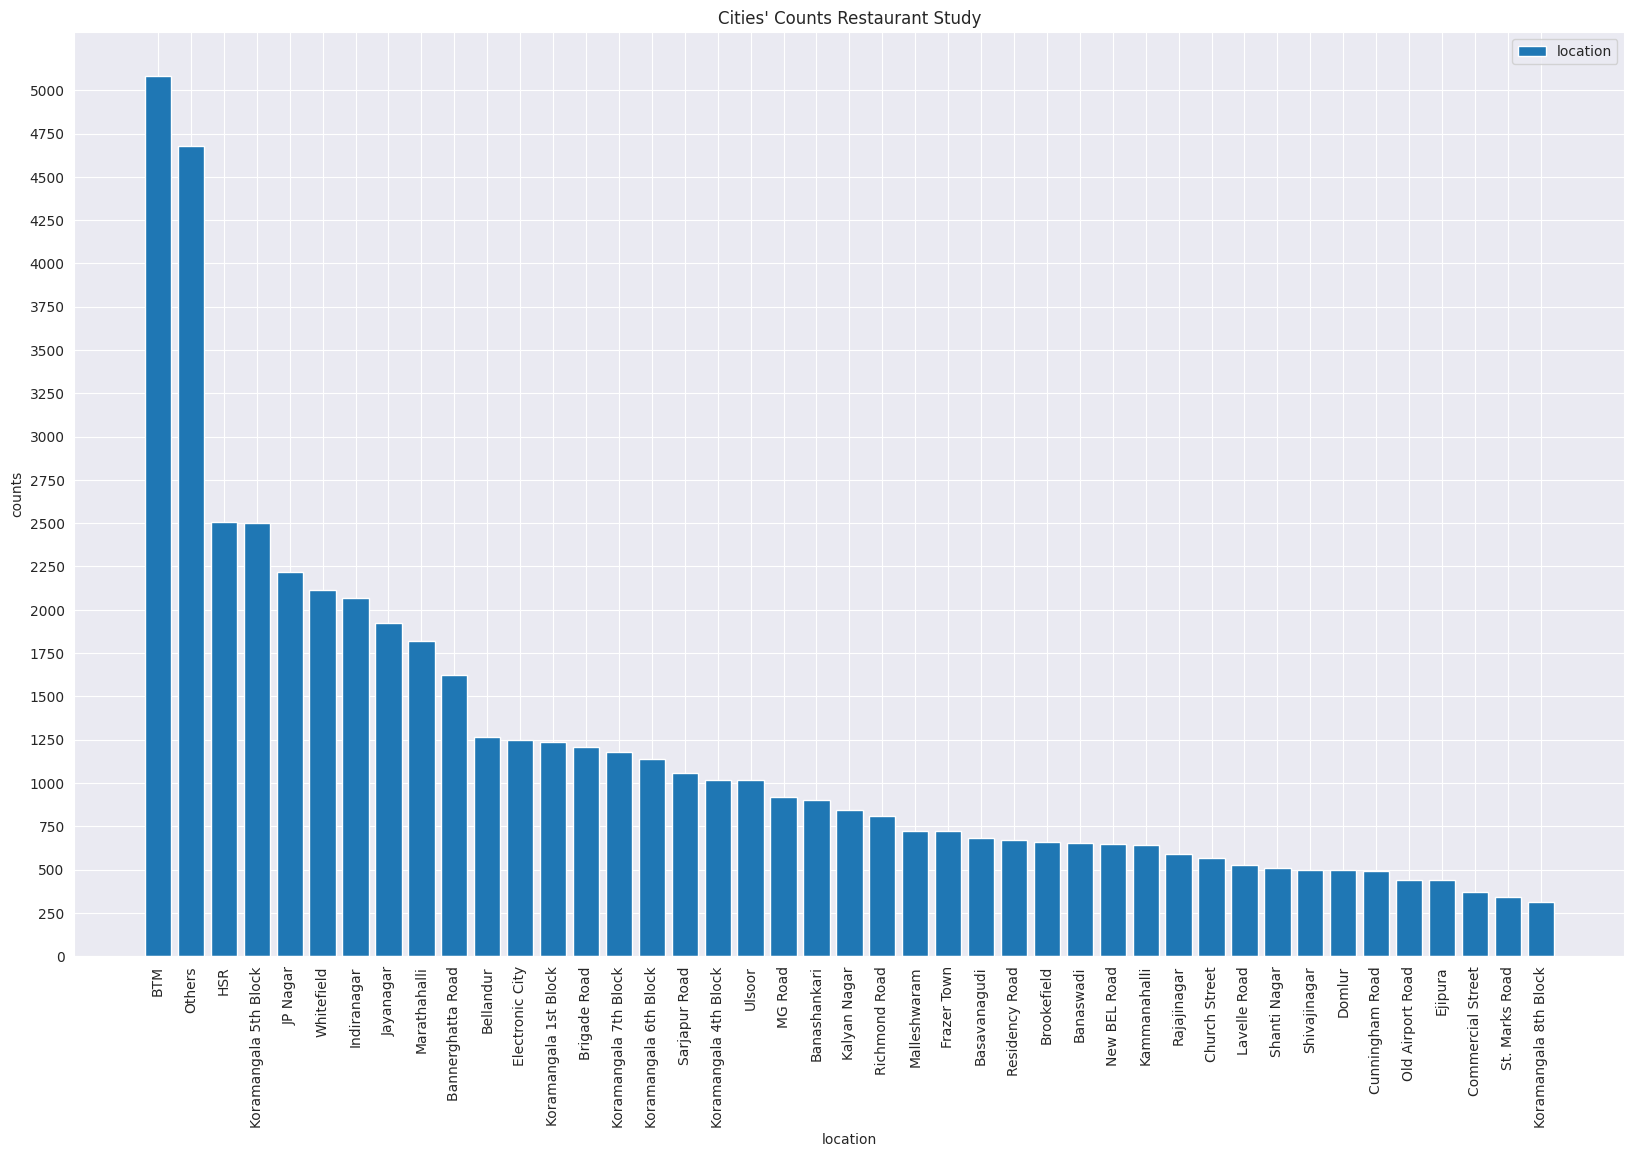

In [123]:
#############################
##MATPLOTLIB IMPLEMENTATION##
#############################
# Define chart size
plt.figure(figsize=(20,12))

# Extract counts, indexes & values
cities = df['city'].value_counts()
city_idx = cities.index
city_vals = cities.values

# Define chart labels
plt.xlabel("location")
plt.xticks(rotation=90)
plt.ylabel("counts")
plt.yticks(np.arange(0, max(city_vals)+1, step=250))
plt.title("Cities' Counts Restaurant Study")

# Plotting
plt.bar(city_idx,city_vals,label="location")
plt.legend()


# ##########################
# ##SEABORN IMPLEMENTATION##
# ##########################
# plt.figure(figsize=(20,12))
# ax = sns.countplot(x = df['city'])
# plt.xticks(rotation=90)

In [124]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'city',
       'restaurant_type', 'cuisines', 'cost2plates', 'serving_style'],
      dtype='object')

# 2) ‘online_order’ yes/no counts Bar Chart.

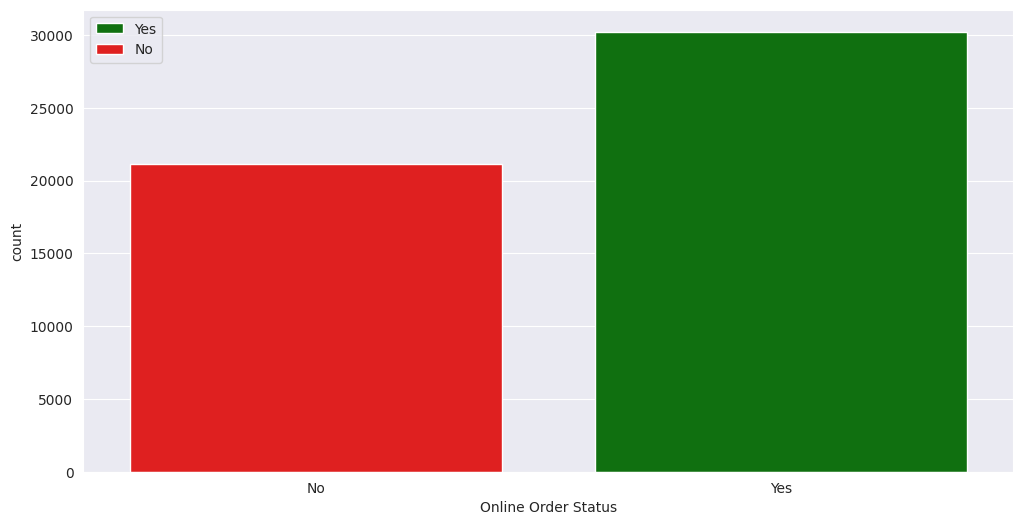

In [125]:
# #############################
# ##MATPLOTLIB IMPLEMENTATION##
# #############################
# # Define chart size
# plt.figure(figsize=(16,8))
# 
# # Extract counts, indexes & values
# online_orders = df['online_order'].value_counts()
# online_order_idx = online_orders.index
# online_order_vals = online_orders.values
# 
# # Define chart labels
# plt.xlabel("Online Order Status")
# plt.ylabel("Counts")
# plt.title("An Overview of Online Orders")
# 
# # Plotting
# colors = ["green","red"]
# plt.bar(online_order_idx,online_order_vals,label=["Yes","No"],color=colors)
# plt.legend(title="Online Orders Status")

##########################
##SEABORN IMPLEMENTATION##
##########################
plt.figure(figsize=(12,6))
plt.xlabel("Online Order Status")
order_seq = ["No","Yes"]
colors = ["green","red"]
ax = sns.countplot(x = df['online_order'],palette=colors,hue=df['online_order'],order=order_seq)
ax.legend(labels=["Yes","No"])

# 3) ‘book_table’ yes/no counts Bar Chart.

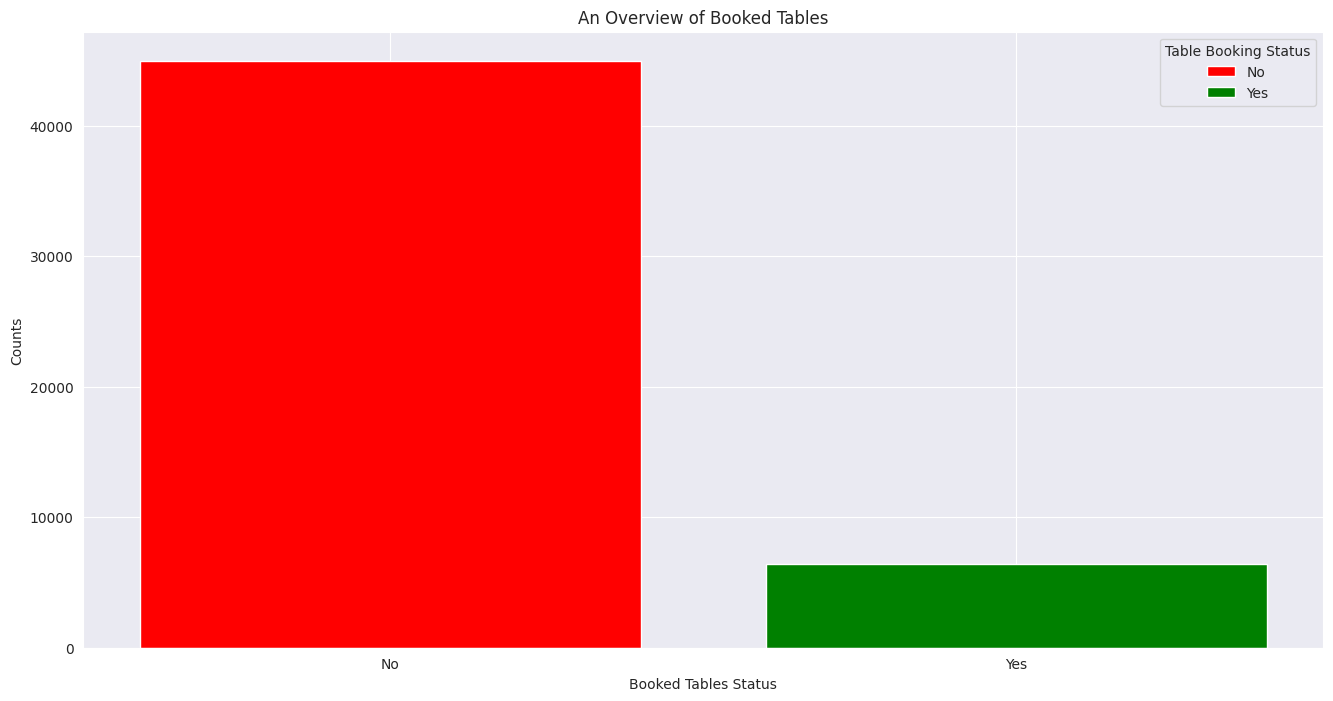

In [126]:
#############################
##MATPLOTLIB IMPLEMENTATION##
#############################
# Define chart size
plt.figure(figsize=(16,8))

# Extract counts, indexes & values
book_tables = df['book_table'].value_counts()
book_table_idx = book_tables.index
book_table_vals = book_tables.values

# Define chart labels
plt.xlabel("Booked Tables Status")
plt.ylabel("Counts")
plt.title("An Overview of Booked Tables")

# Plotting
colors = ['red','green']
plt.bar(book_table_idx,book_table_vals,label=["No","Yes"],color=colors)
plt.legend(title="Table Booking Status")

# ##########################
# ##SEABORN IMPLEMENTATION##
# ##########################
# plt.figure(figsize=(12,6))
# plt.xlabel("Booked Tables Status")
# colors = ["green","red"]
# ax = sns.countplot(x = df['book_table'], hue=df['book_table'], palette=colors)
# ax.legend(labels=["Yes","No"])

# 4) ‘rate’ vs ‘online_order’ yes/no counts Box Plot.

Text(0.5, 1.0, 'Boxplot of Rate based on Online Order')

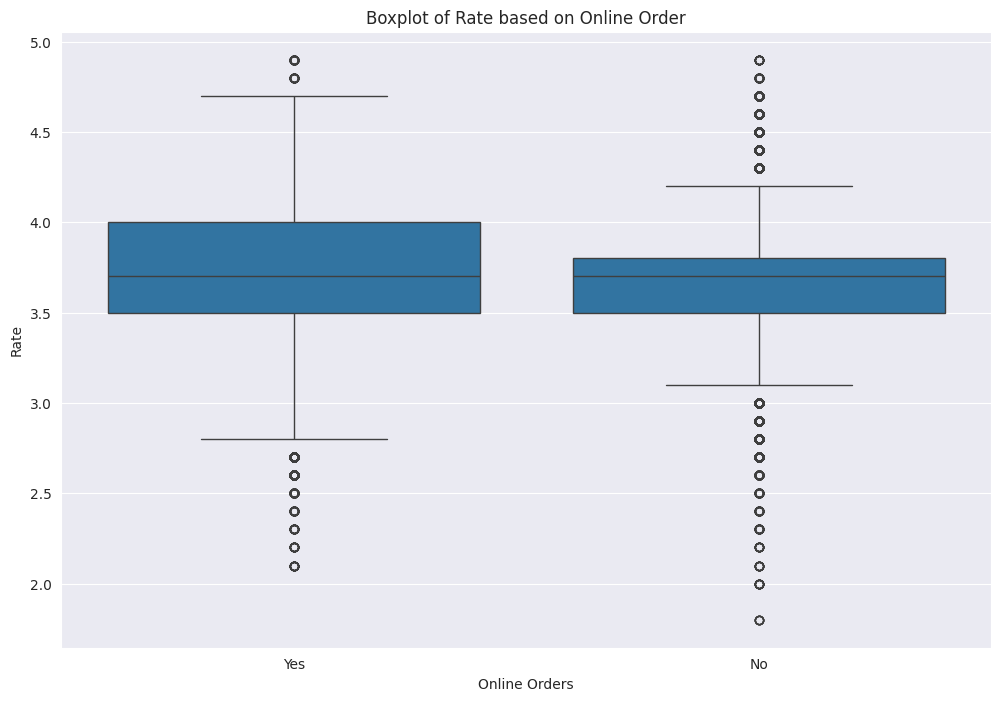

In [127]:
# #############################
# ##MATPLOTLIB IMPLEMENTATION##
# #############################
# # Define chart size
# plt.figure(figsize=(12,8))
# 
# # Extract counts, indexes & values
# # book_tables = df['book_table'].value_counts()
# # book_table_idx = book_tables.index
# # book_table_vals = book_tables.values
# 
# # Define chart labels
# plt.xlabel("Online Orders")
# plt.ylabel("Counts")
# plt.yticks(np.arange(0, 5, step=0.25))
# plt.title("Boxplot of Rate based on Online Order")
# 
# # Plotting
# plt.boxplot([df[df['online_order'] == 'Yes']['rate'],
#             df[df['online_order'] == 'No']['rate']],
#             labels=['Yes', 'No'])

##########################
##SEABORN IMPLEMENTATION##
##########################
plt.figure(figsize=(12,8))
disp_order = ["Yes","No"]
ax = sns.boxplot(x = 'online_order', y = 'rate', data=df, order=disp_order)

# Set labels and title
plt.xlabel('Online Orders')
plt.ylabel('Rate')
plt.title('Boxplot of Rate based on Online Order')

In [128]:
df['rate'].mean()

3.7015108220725104